# Random Forest Classifier

In [106]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('data/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [108]:
# Split the data into x and y variables.
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [109]:
#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)

(189, 4)
(81, 4)


# Build Model

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
X_train.head()

,age,sex,BP,cholestrol
55,41,0,105,198
22,43,1,115,303
200,68,1,118,277
11,53,1,142,226
15,71,0,112,149


In [112]:
y_train.head()

55     0
22     0
200    0
11     0
15     0
Name: heart disease, dtype: int64

In [113]:
rf = RandomForestClassifier(random_state=100, max_depth=3, n_estimators=10)

In [114]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=100)

In [115]:
# Extract all 10 trees.
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=186422792),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=735107864),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1195587395),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1769725799),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1823289175),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=113311823),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1480802224),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=638252938),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=20267358),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=673068980)]

In [116]:
# We can check individual tree as well.
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=186422792)

In [117]:
sample_tree = rf.estimators_[5]

In [118]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score


# Creating helper functions to evaluate model performance and help plot the decision tree

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

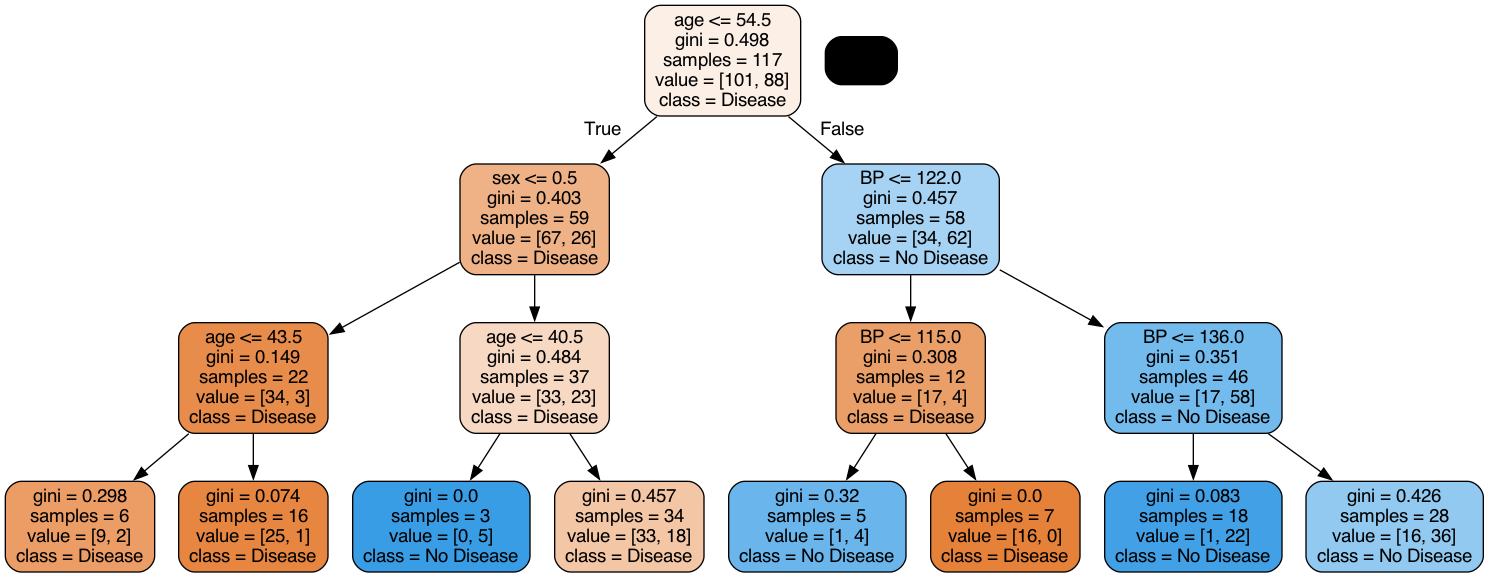

In [119]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [120]:
evaluate_model(sample_tree)

Train Accuracy : 0.7142857142857143
Train Confusion Matrix:
[[76 29]
 [25 59]]
--------------------------------------------------
Test Accuracy : 0.49382716049382713
Test Confusion Matrix:
[[21 24]
 [17 19]]


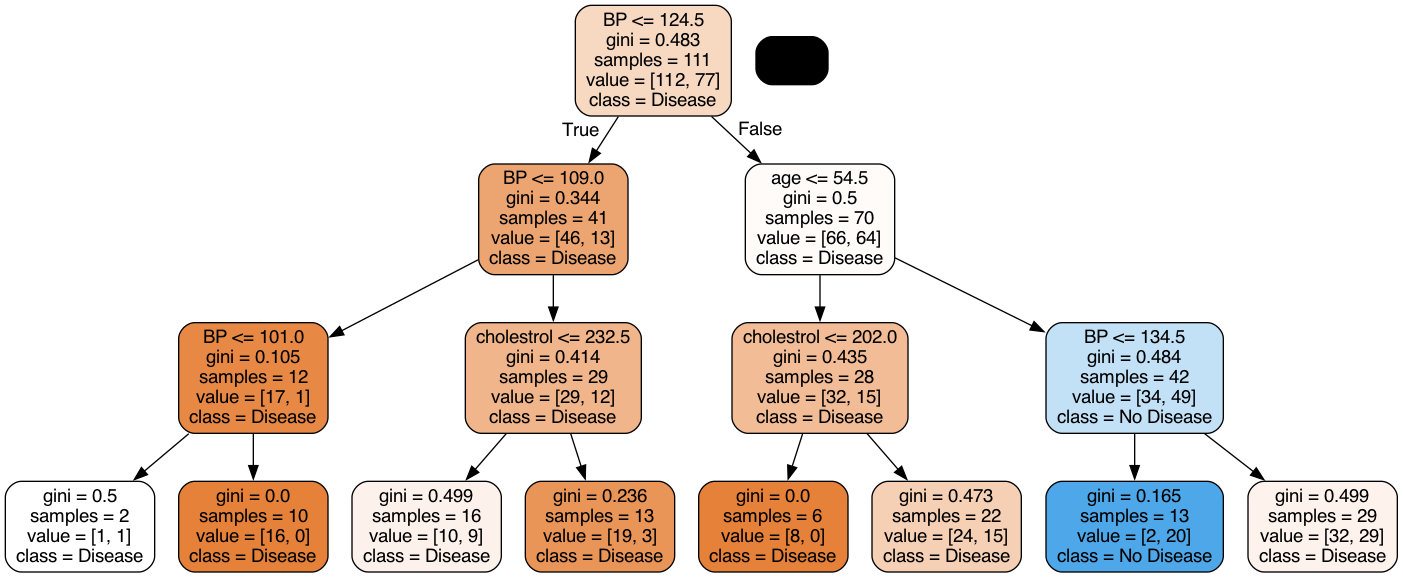

In [121]:
sample_tree = rf.estimators_[3]
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

### Note: Both tree 3 and 5 are different.

## OOB Score

In [122]:
# By default its not calculated. So we need to enable it.
rf = RandomForestClassifier(random_state=100, max_depth=3, n_estimators=10, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=100)

In [123]:
rf.oob_score_

0.6455026455026455

## Tune some hyperparameters using gridsearchcv

In [124]:
#Specify the different params you want to try.
params = {
    'max_depth': [2,3,4,5,10,15,20],
    'min_samples_leaf': [5,10,20,50,100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200] #number of trees in forest
}

In [125]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           cv=4,
                           n_jobs=1, 
                           verbose=1, 
                           scoring='accuracy')

In [126]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 525 candidates, totalling 2100 fits
CPU times: user 2min 21s, sys: 1.11 s, total: 2min 23s
Wall time: 2min 23s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [132]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=5,
                       n_estimators=30, oob_score=True, random_state=100)

In [133]:
evaluate_model(rf_best)

Train Accuracy : 0.8253968253968254
Train Confusion Matrix:
[[90 15]
 [18 66]]
--------------------------------------------------
Test Accuracy : 0.5925925925925926
Test Confusion Matrix:
[[27 18]
 [15 21]]


#### Note: It is better than the individual tree performance.

# Get variable importance in random forests

In [127]:
rf = RandomForestClassifier(random_state=100, max_depth=3, n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=100)

In [128]:
rf.feature_importances_

array([0.3027325 , 0.20508167, 0.24134724, 0.25083859])

In [129]:
imp_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Imp': rf.feature_importances_
})

In [130]:
imp_df.sort_values(by='Imp', ascending=False)

,Variable,Imp
0,age,0.302732
3,cholestrol,0.250839
2,BP,0.241347
1,sex,0.205082


#### Note: Here Age is most importante variable.